     sample_ID  Bacteria;Abditibacteriota;Abditibacteria  \
0       H18090                                         0   
1       H18093                                         0   
2       H18094                                         0   
3       H18095                                         0   
4       H18096                                         0   
...        ...                                       ...   
1284    H34151                                         0   
1285    H34153                                         0   
1286    H34155                                         0   
1287    H34165                                         0   
1288    H34166                                         0   

      Bacteria;Acidobacteriota;Aminicenantia  \
0                                          0   
1                                          0   
2                                          0   
3                                          0   
4                                      

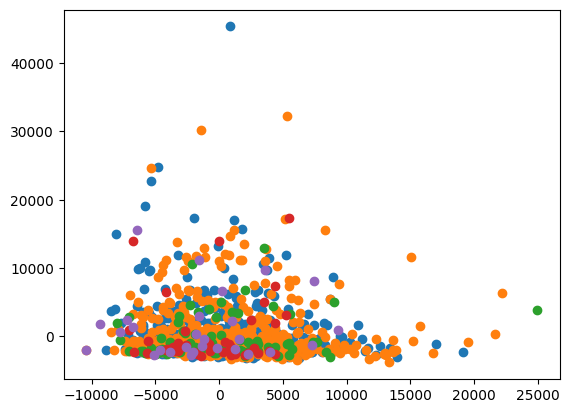

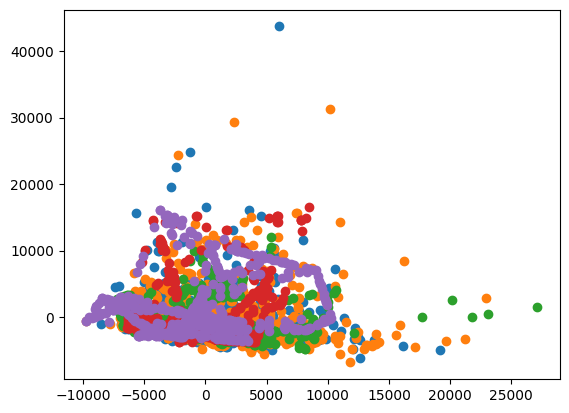

In [20]:
from imblearn.over_sampling import SMOTE
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
from sklearn.decomposition import PCA



def pca(df, no):
    df_tmp = df.copy()
    pca = PCA(n_components=2)
    header = df_tmp.columns.values[1:]
    df_withoutLabels = df_tmp.drop(columns=header[-1])
    principalComponents = pca.fit_transform(df_withoutLabels.values)
    df_principal_components = pd.DataFrame(principalComponents)
    df_principal_components['label'] = df.iloc[:,-1].values
    df_pc_healthy = df_principal_components[(df_principal_components.label == 0)]
    df_pc_T2D = df_principal_components[(df_principal_components.label == 1)]
    df_pc_IBD = df_principal_components[(df_principal_components.label == 2)]
    df_pc_CAD = df_principal_components[(df_principal_components.label == 3)]
    df_pc_CKD = df_principal_components[(df_principal_components.label == 4)]
    df_pc_healthy = df_pc_healthy.drop(columns=header[-1])
    df_pc_T2D = df_pc_T2D.drop(columns=header[-1])
    df_pc_IBD = df_pc_IBD.drop(columns=header[-1])
    df_pc_CAD = df_pc_CAD.drop(columns=header[-1])
    df_pc_CKD = df_pc_CKD.drop(columns=header[-1])

    plt.figure(no)
    plt.scatter(np.array(df_pc_healthy.values[0:, 0]), np.array(df_pc_healthy.values[0:, 1]))
    plt.scatter(np.array(df_pc_T2D.values[0:, 0]), np.array(df_pc_T2D.values[0:, 1]))
    plt.scatter(np.array(df_pc_IBD.values[0:, 0]), np.array(df_pc_IBD.values[0:, 1]))
    plt.scatter(np.array(df_pc_CAD.values[0:, 0]), np.array(df_pc_CAD.values[0:, 1]))
    plt.scatter(np.array(df_pc_CKD.values[0:, 0]), np.array(df_pc_CKD.values[0:, 1]))


df = pd.read_csv('../src/DataMatrices/Class/unionMatrix_Class.csv')

oversample = SMOTE()
print(df)
print(df[df.columns[1:]])

X = df[df.columns[1:-1]].values
y = df[df.columns[-1]]
X, y = oversample.fit_resample(X, y)
print("!", len(X), "vs.", len(df[df.columns[-1]]))

df_new = pd.DataFrame(X)
df_new['label'] = y

pca(df.drop(columns='sample_ID'), 1)

#df_new = df.copy()

#df_new[df_new.columns[1:-1]] = X
#df_new[df_new.columns[-1]] = y

pca(df_new, 2)

df_new.to_csv('SMOTE' + 'class' + '.csv', index=False)
